## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [6]:
# Load file
df = pd.read_csv('opsd_germany_daily.csv', index_col=0)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
# Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [8]:
# Transform the dates into datetime format
df.index = pd.to_datetime(df.index)

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

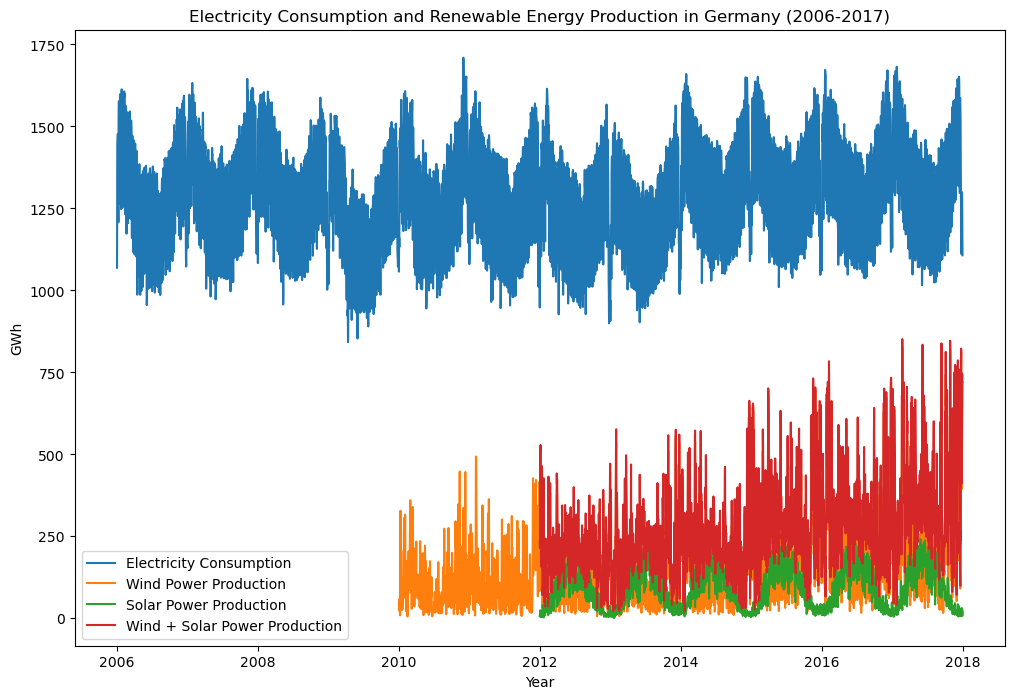

In [9]:
# Plot the different time series
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'], label='Electricity Consumption')
plt.plot(df['Wind'], label='Wind Power Production')
plt.plot(df['Solar'], label='Solar Power Production')
plt.plot(df['Wind+Solar'], label='Wind + Solar Power Production')
plt.title('Electricity Consumption and Renewable Energy Production in Germany (2006-2017)')
plt.xlabel('Year')
plt.ylabel('GWh')
plt.legend()
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

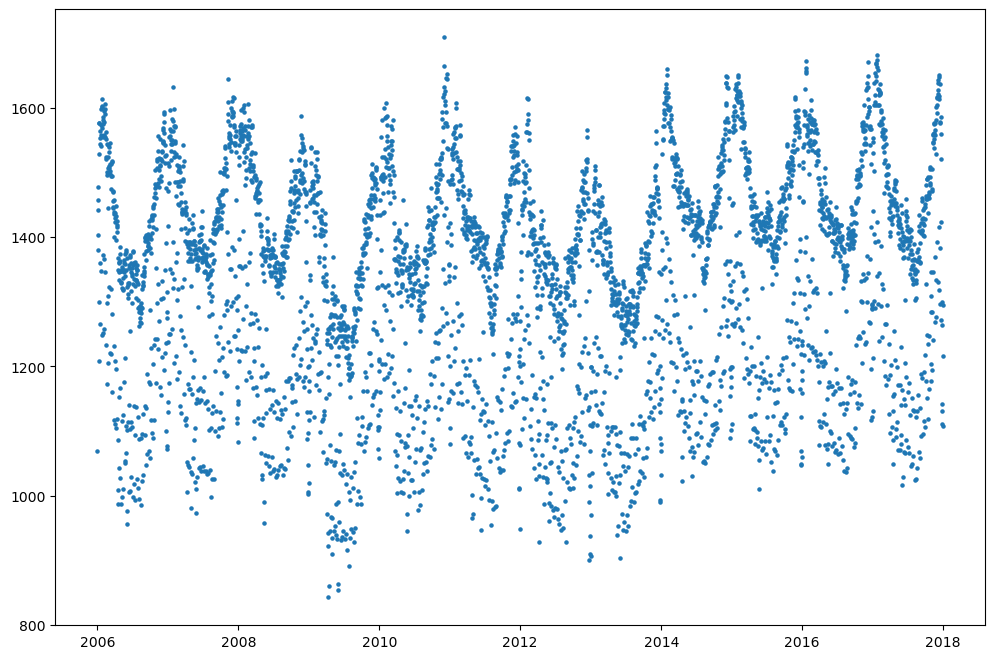

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(df.index, df['Consumption'], s=5, label='Electricity Consumption')
plt.show()

And plot the production over time :

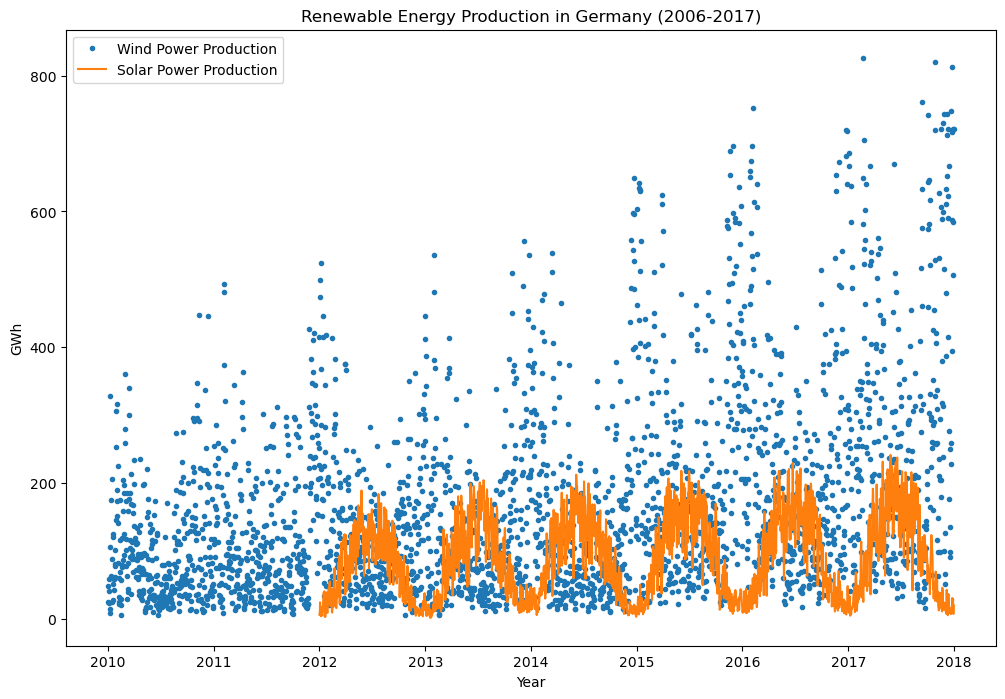

In [20]:
plt.figure(figsize=(12,8))
plt.plot(df['Wind'], label='Wind Power Production',marker='.', linestyle='')
plt.plot(df['Solar'], label='Solar Power Production')
plt.title('Renewable Energy Production in Germany (2006-2017)')
plt.xlabel('Year')
plt.ylabel('GWh')
plt.legend()
plt.show()
plt.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

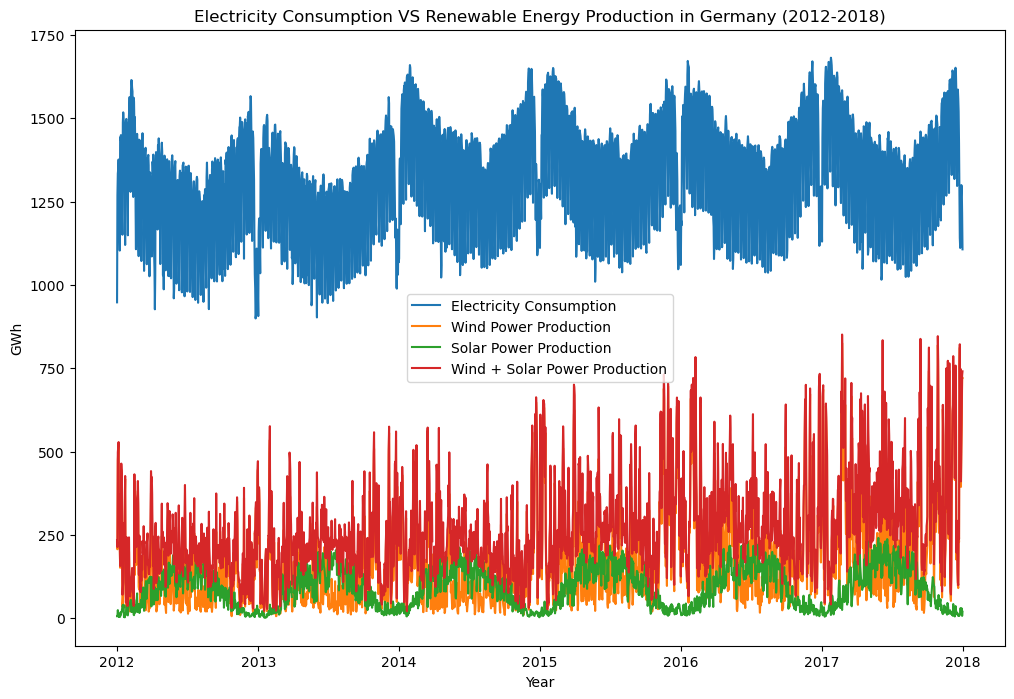

In [26]:
# Extract the data for the specified years
start_year = 2012
end_year = 2018
df_year = df.loc[(df.index.year >= start_year) & (df.index.year <= end_year)]

# Create the plot
plt.subplots(figsize=(12,8))
plt.plot(df_year['Consumption'], label='Electricity Consumption')
plt.plot(df_year['Wind'], label='Wind Power Production')
plt.plot(df_year['Solar'], label='Solar Power Production')
plt.plot(df_year['Wind+Solar'], label='Wind + Solar Power Production')
plt.title(f'Electricity Consumption VS Renewable Energy Production in Germany ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('GWh')
plt.legend()
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

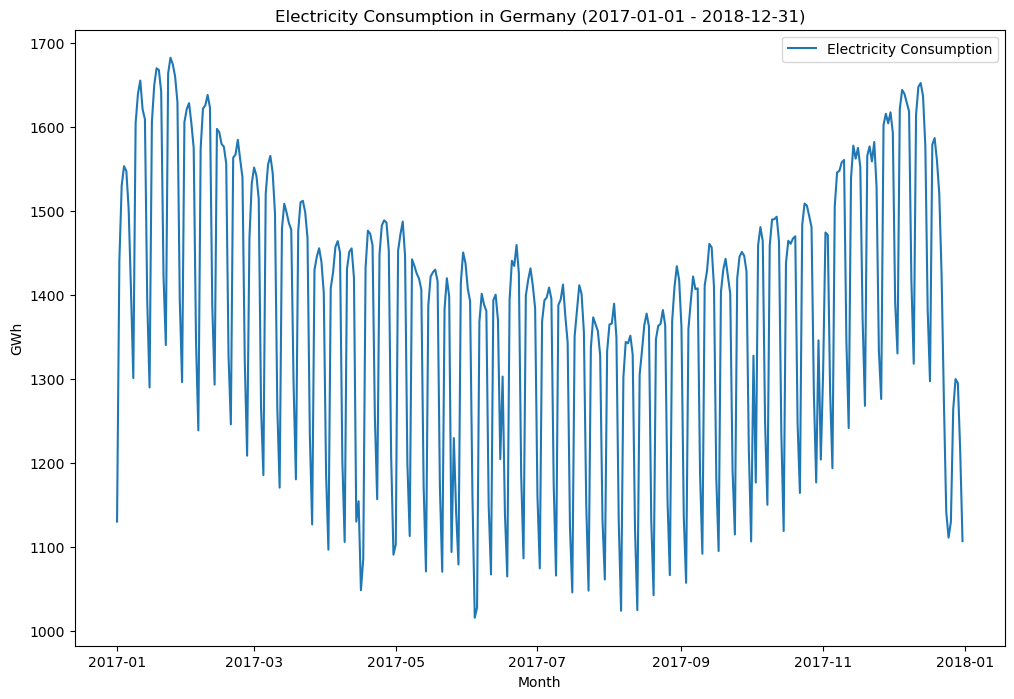

In [34]:
# Plot over the year
# Extract the data for the year range
start_date = '2017-01-01'
end_date = '2018-12-31'
df_year = df.loc[start_date:end_date]

# Create the plot
plt.subplots(figsize=(12,8))
plt.plot(df_year['Consumption'], label='Electricity Consumption')
plt.title(f'Electricity Consumption in Germany ({start_date} - {end_date})')
plt.xlabel('Month')
plt.ylabel('GWh')
plt.legend()
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

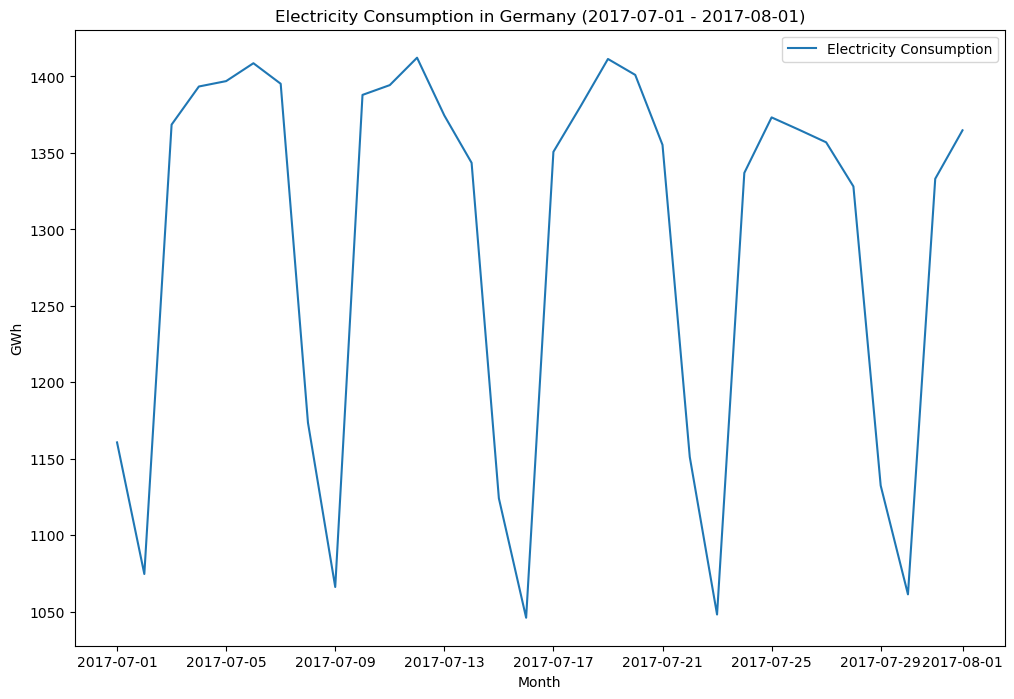

In [35]:
# Plot over a month
# Extract the data for the month range
start_date = '2017-07-01'
end_date = '2017-08-01'
df_month = df.loc[start_date:end_date]
# Create the plot
plt.subplots(figsize=(12,8))
plt.plot(df_month['Consumption'], label='Electricity Consumption')
plt.title(f'Electricity Consumption in Germany ({start_date} - {end_date})')
plt.xlabel('Month')
plt.ylabel('GWh')
plt.legend()
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

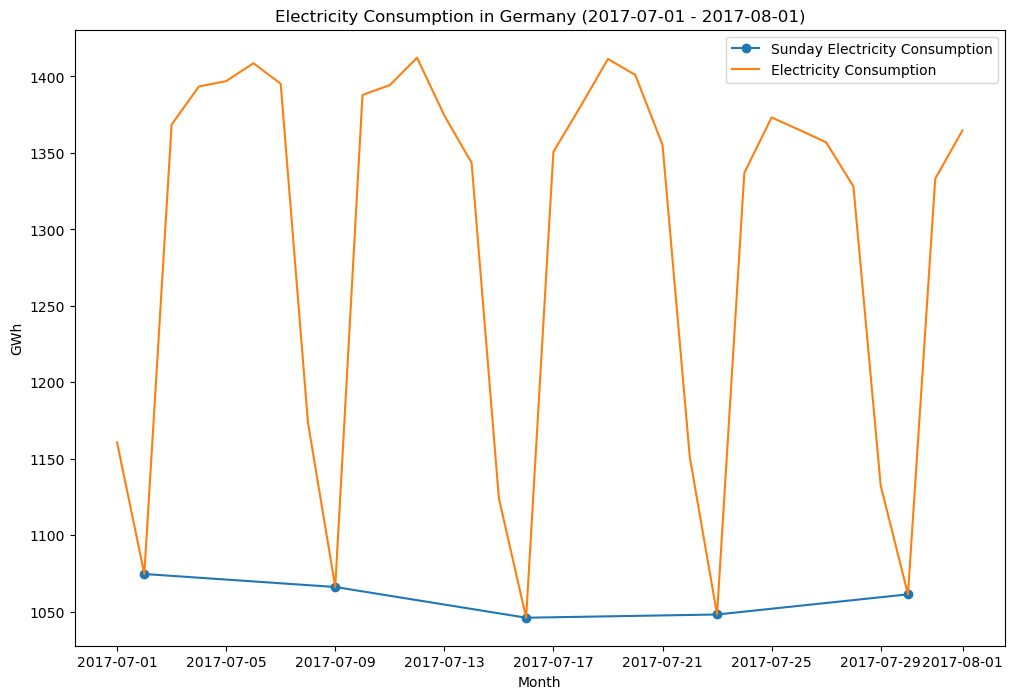

In [73]:
# Plot on Sundays
# Extract the data for the month range
start_date = '2017-07-01'
end_date = '2017-08-01'
df_month = df.loc[start_date:end_date]

# Extract the data for Sundays
df_sundays = df_month[df_month.index.weekday == 6]
plt.figure(figsize=(12,8))
plt.plot(df_sundays['Consumption'], label='Sunday Electricity Consumption', marker = 'o')
plt.plot(df_month['Consumption'], label='Electricity Consumption')
plt.title(f'Electricity Consumption in Germany ({start_date} - {end_date})')
plt.xlabel('Month')
plt.ylabel('GWh')
plt.legend()
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [39]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = df_2['Date'].dt.year
df_2['month'] = df_2['Date'].dt.month
years = df_2['year'].unique()
print(years)
df_2.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1


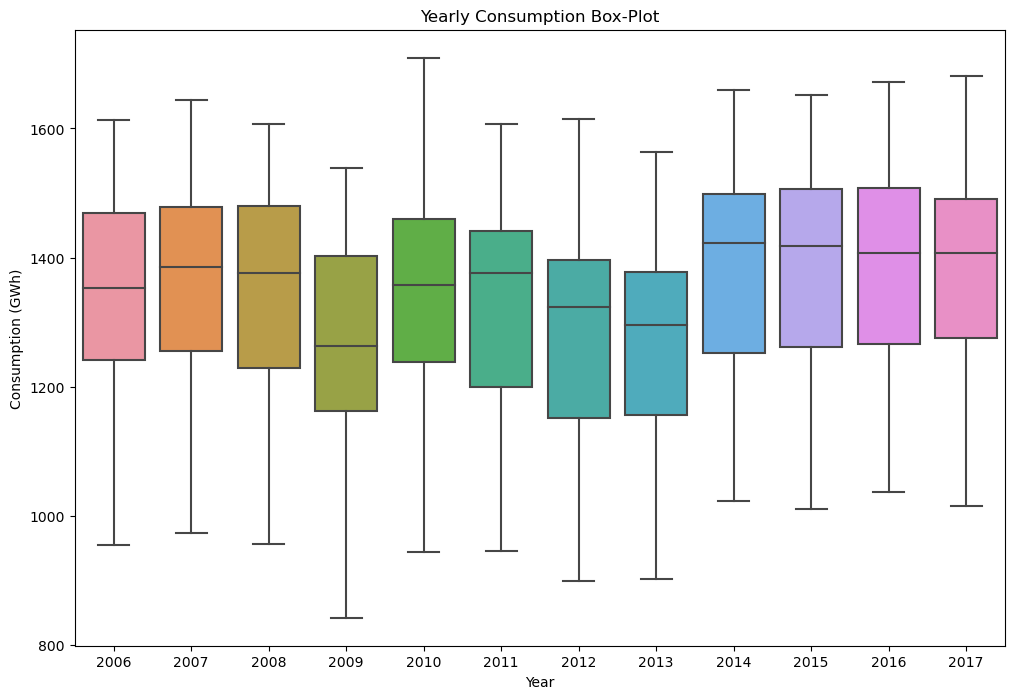

In [42]:
# Boxplot year
plt.figure(figsize=(12,8))
sns.boxplot(data=df_2, x='year', y='Consumption')
plt.title('Yearly Consumption Box-Plot')
plt.xlabel('Year')
plt.ylabel('Consumption (GWh)')
plt.show()

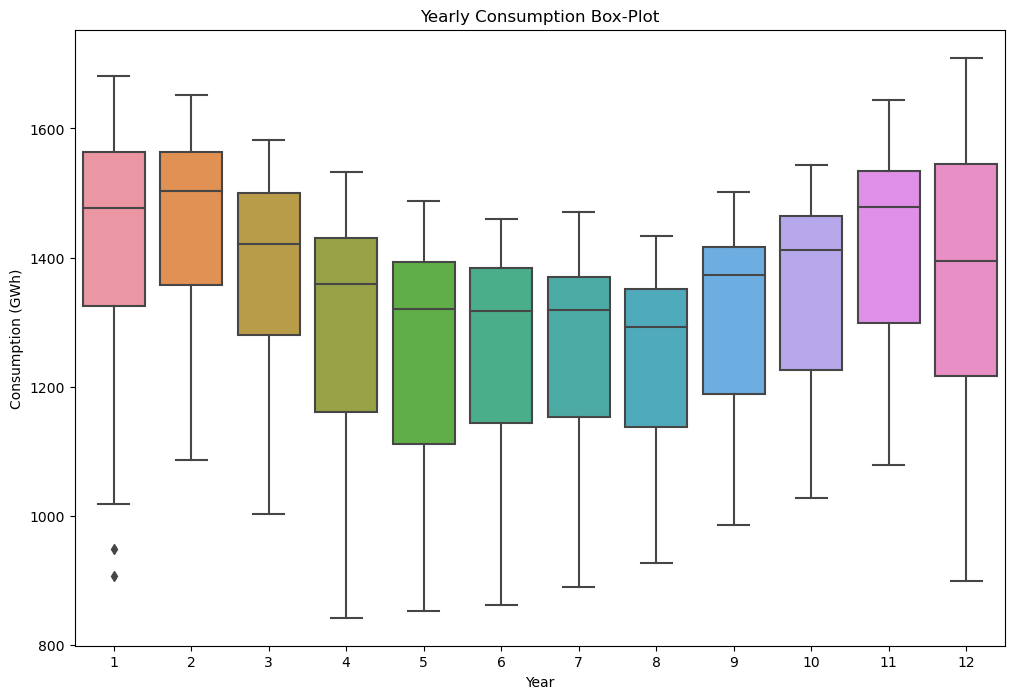

In [43]:
# Boxplot month
plt.figure(figsize=(12,8))
sns.boxplot(data=df_2, x='month', y='Consumption')
plt.title('Yearly Consumption Box-Plot')
plt.xlabel('Year')
plt.ylabel('Consumption (GWh)')
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

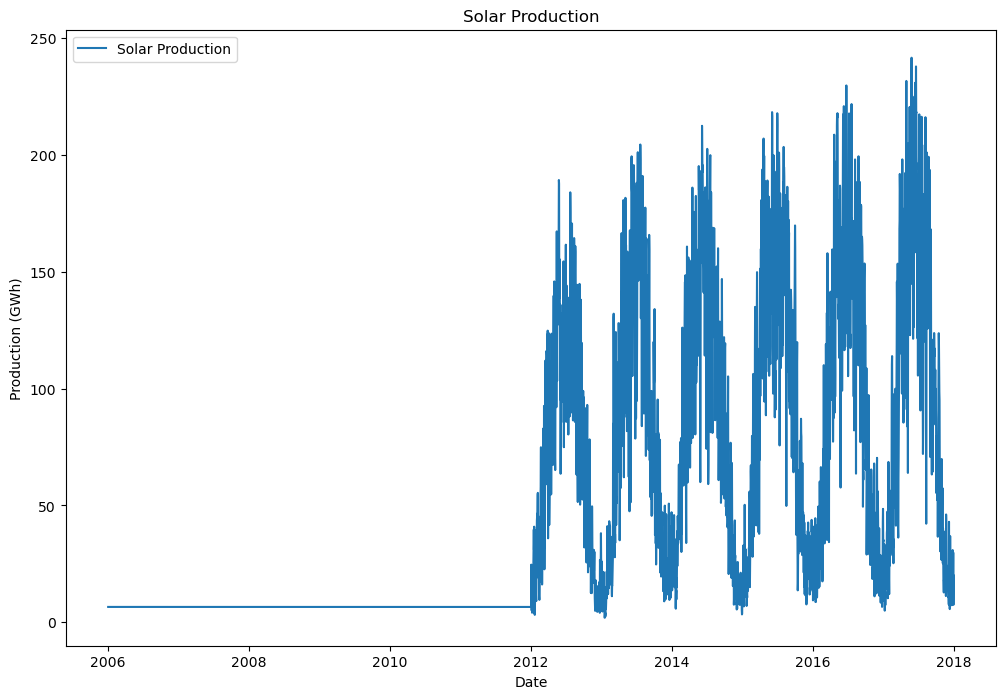

In [50]:
# Plot Solar
df = pd.read_csv('opsd_germany_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df['Solar'].fillna(method='bfill', inplace=True)
plt.subplots(figsize=(12,8))
plt.plot(df['Solar'], label='Solar Production')
plt.title('Solar Production')
plt.xlabel('Date')
plt.ylabel('Production (GWh)')
plt.legend()
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [62]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
# Correlation between consumption and overall production
Correlation = df['Consumption'].corr(df['Wind+Solar'])
print(Correlation)

0.02764784385924092


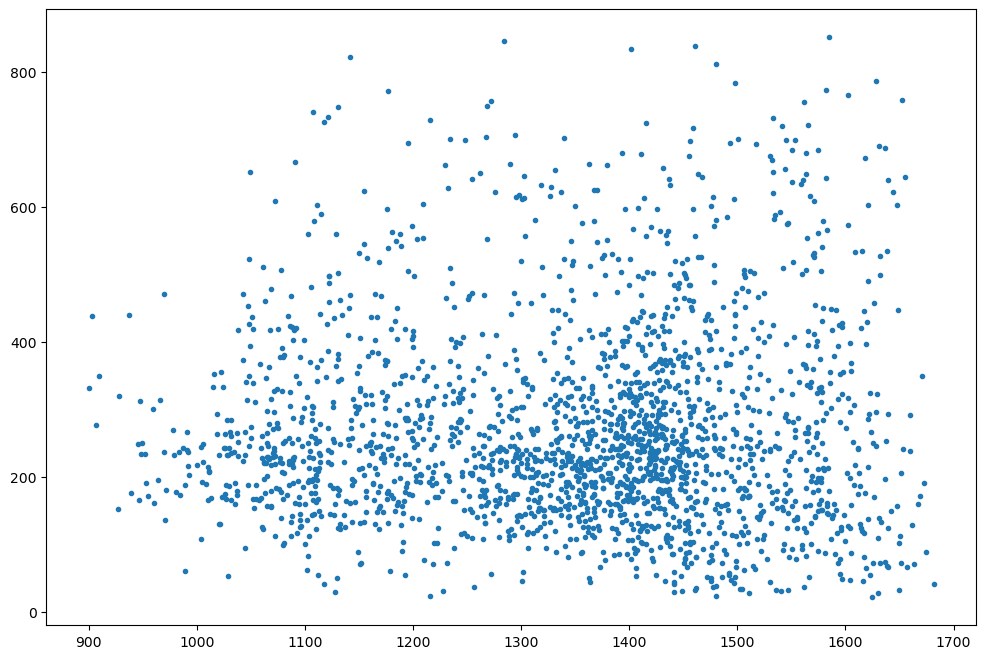

In [63]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'],df['Wind+Solar'],linestyle='',marker='.')
plt.show()

In [67]:
# Correlation between solar production and wind production
Correlation = df['Solar'].corr(df['Wind'])
print(Correlation)

-0.3088318295977341


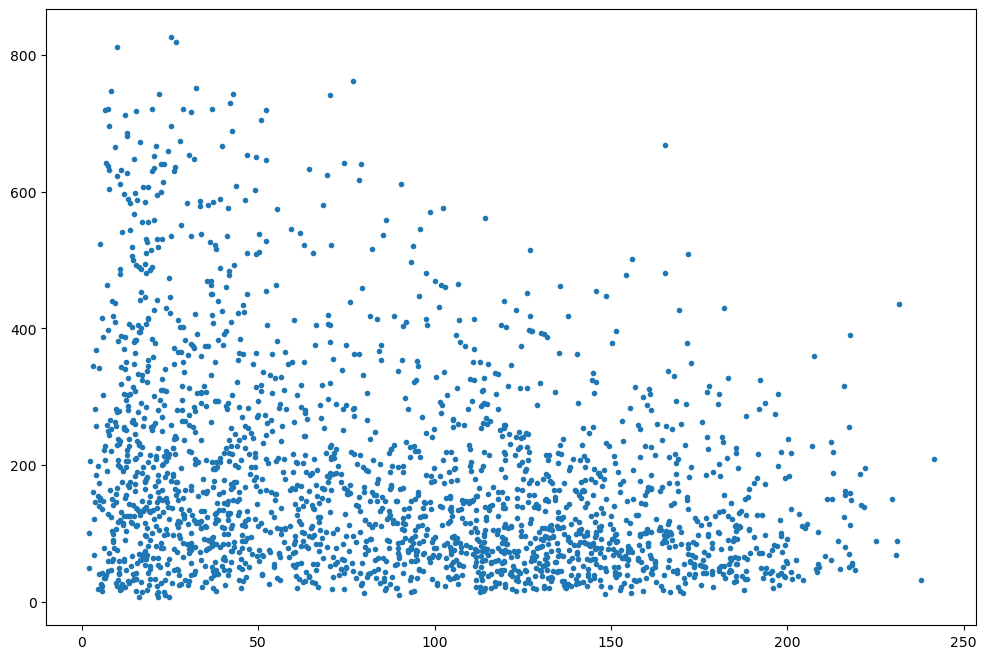

In [65]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(df['Solar'],df['Wind'],linestyle='',marker='.')
plt.show()

In [68]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
# Correlation between consumption and wind production
Correlation = df['Consumption'].corr(df['Wind'])
print(Correlation)

0.13682075809765853


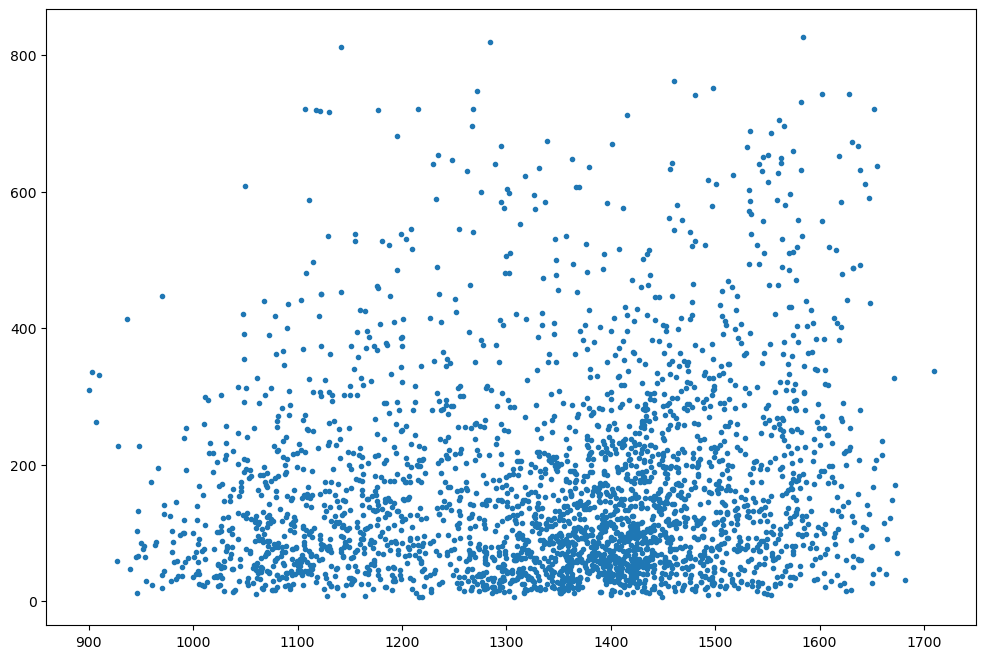

In [69]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'],df['Wind'],linestyle='',marker='.')
plt.show()

In [70]:
# Correlation between consumption and solar production
Correlation = df['Consumption'].corr(df['Solar'])
print(Correlation)

-0.27894265519914385


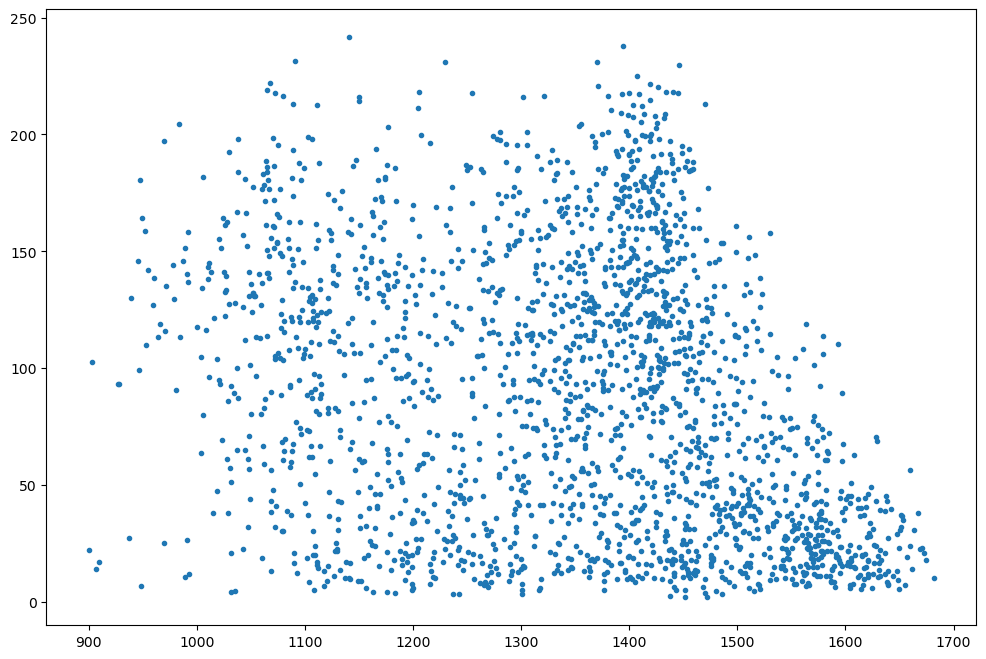

In [71]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(df['Consumption'],df['Solar'],linestyle='',marker='.')
plt.show()